In [1]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform
import matplotlib.pyplot as plt
from invertiblewavelets import *
from scipy import signal

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [2]:
data = np.load("data.npy")

# Adding some noise
sample_rate = 45.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array
data += 100*np.sin(2.0 * np.pi *10 * t)       # 0.1 Hz sine wave

#### Create Transform Object and Analysis Filters

In [3]:
# Initializing the Transform object automatically forms the analysis and synthesis filter bank during __init__
transform = Transform(
    data=data,
    fs = sample_rate,
    wavelet=Cauchy(100),
    pad_method='symmetric', # Padding method for the convolution calls np.pad. Set to None if no padding
    scales = 'dyadic', # Scales to use. Can be a list of scales or 'dyadic' for dyadic scales
    Mc = 0,
    dj = 1/20

)


#### Transform and Inverse the Data

Reconstruction error: 10340.797099760932


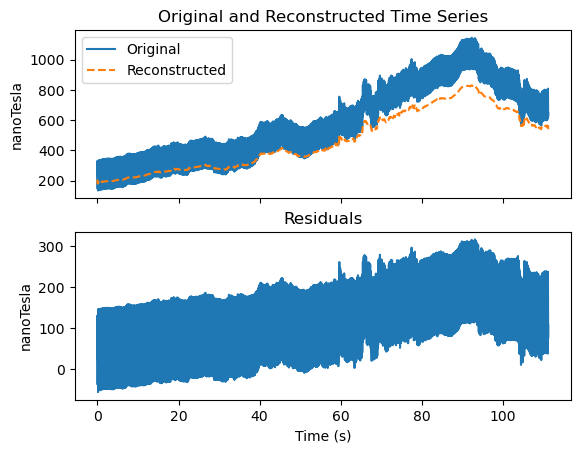

In [4]:
# Perform forward wavelet transform
coefficients = transform.forward(data)

# Perform inverse wavelet transform (reconstruction)
reconstructed = transform.inverse(coefficients)

# Calculate and print reconstruction error
reconstruction_error = np.linalg.norm(reconstructed - data)
print(f"Reconstruction error: {reconstruction_error}")

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, reconstructed, label='Reconstructed', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[0].set_title('Original and Reconstructed Time Series')
ax[1].plot(t, data - reconstructed)
ax[1].set_title('Residuals')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

#### Check the wavelet spectral coverage

Text(0.5, 0, 'Frequency Channel')

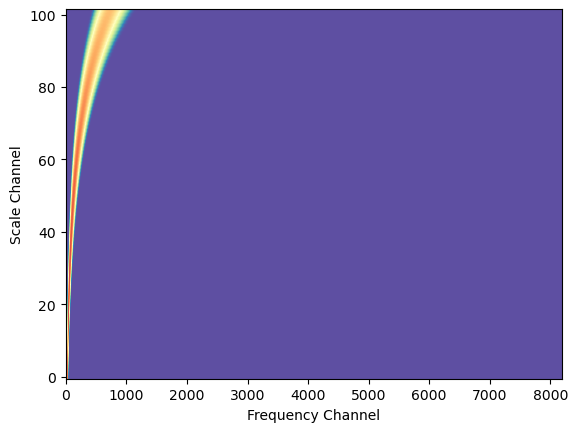

In [5]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(np.abs(transform.Wfreq)+1e-3), aspect='auto', origin='lower', cmap='Spectral_r')
ax.set_ylabel('Scale Channel')
ax.set_xlabel('Frequency Channel')

#### Check Wavelet Orthgonality

C:\Users\aphoffm2\AppData\Local\Temp\1\ipykernel_20048\3827981036.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(delta_kl)), aspect='auto', origin='lower')


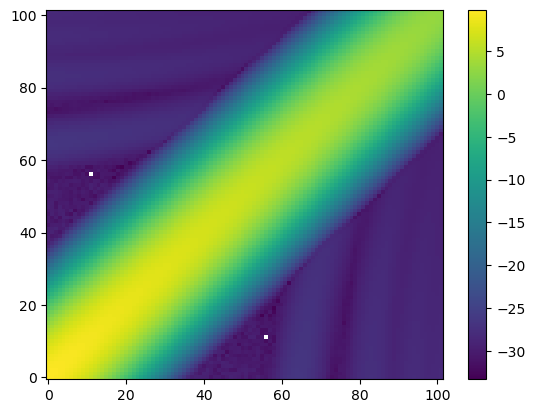

In [6]:
w_time = np.fft.ifft(transform.Wfreq, axis=-1)
delta_kl = w_time.conj() @ w_time.T
plt.imshow(np.log(np.abs(delta_kl)), aspect='auto', origin='lower')
cbar = plt.colorbar()

0.9899999999999999


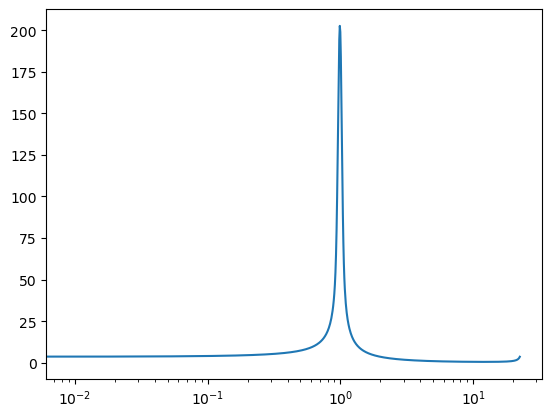

In [7]:
plt.plot(np.fft.fftfreq(num_samples, d = 1/45)[:num_samples//2],np.abs(np.fft.fft(Cauchy(2000).eval_analysis(t)[:num_samples//2])))
plt.xscale('log')
print(np.fft.fftfreq(num_samples, d = 1/45)[np.argmax(np.abs(np.fft.fft(Cauchy(2000).eval_analysis(t)[:num_samples//2])))])

In [8]:

print(1/0.504)


1.9841269841269842


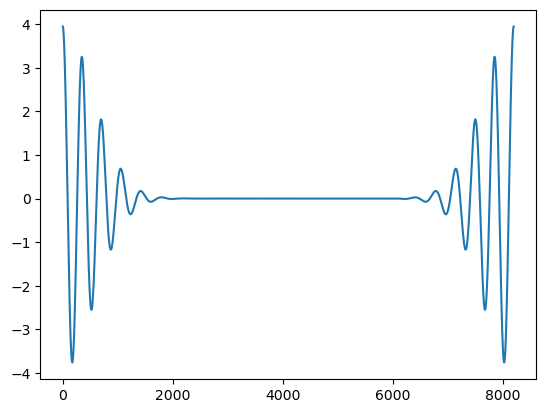

In [9]:
plt.plot(np.fft.ifft(transform.Wfreq[2], axis=-1).real)